In [1]:
import datetime
print(datetime.datetime.now())
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

2019-06-28 01:29:30.780619


In [2]:
df = pd.read_csv("/home/prawin/final_heart.csv")

In [3]:
inputs = df.drop('num',axis='columns')

In [4]:
target = df['num']

In [5]:
from sklearn.preprocessing import LabelEncoder
le_age = LabelEncoder()
le_sex = LabelEncoder()
le_trestbps = LabelEncoder()
le_chol = LabelEncoder()
le_fbs = LabelEncoder()
le_thalach = LabelEncoder()
le_exang = LabelEncoder()
le_oldpeak = LabelEncoder()
le_cp_1 = LabelEncoder()
le_cp_2 = LabelEncoder()
le_cp_3 = LabelEncoder()
le_cp_4 = LabelEncoder()
le_thal_3 = LabelEncoder()
le_thal_6 = LabelEncoder()
le_thal_7 = LabelEncoder()
le_slope_1 = LabelEncoder()
le_slope_2 = LabelEncoder()
le_slope_3 = LabelEncoder()
le_ca_0 = LabelEncoder()
le_ca_1 = LabelEncoder()
le_ca_2 = LabelEncoder()
le_ca_3 = LabelEncoder()
le_restecg_0 = LabelEncoder()
le_restecg_1= LabelEncoder()
le_restecg_2= LabelEncoder()


In [6]:
inputs['age_n'] = le_age.fit_transform(inputs['age'])
inputs['sex_n'] = le_sex.fit_transform(inputs['sex'])
inputs['trestbps_n'] = le_trestbps.fit_transform(inputs['trestbps'])
inputs['chol_n'] = le_chol.fit_transform(inputs['chol'])
inputs['fbs_n'] = le_fbs.fit_transform(inputs['fbs'])
inputs['thalach_n'] = le_thalach.fit_transform(inputs['thalach'])
inputs['exang_n'] = le_exang.fit_transform(inputs['exang'])
inputs['oldpeak_n'] = le_oldpeak.fit_transform(inputs['oldpeak'])
inputs['cp_1_n'] = le_cp_1.fit_transform(inputs['cp_1'])
inputs['cp_2_n'] = le_cp_2.fit_transform(inputs['cp_2'])
inputs['cp_3_n'] = le_cp_3.fit_transform(inputs['cp_3'])
inputs['cp_4_n'] = le_cp_4.fit_transform(inputs['cp_4'])

inputs['thal_3_n'] = le_thal_3.fit_transform(inputs['thal_3'])
inputs['thal_6_n'] = le_thal_6.fit_transform(inputs['thal_6'])
inputs['thal_7_n'] = le_thal_7.fit_transform(inputs['thal_7'])
inputs['slope_1_n'] = le_slope_1.fit_transform(inputs['slope_1'])
inputs['slope_2_n'] = le_slope_2.fit_transform(inputs['slope_2'])
inputs['slope_3_n'] = le_slope_3.fit_transform(inputs['slope_3'])
inputs['ca_0_n'] = le_ca_0.fit_transform(inputs['ca_0'])
inputs['ca_1_n'] = le_ca_1.fit_transform(inputs['ca_1'])
inputs['ca_2_n'] = le_ca_2.fit_transform(inputs['ca_2'])
inputs['ca_3_n'] = le_ca_3.fit_transform(inputs['ca_3'])
inputs['restecg_0_n'] = le_restecg_0.fit_transform(inputs['restecg_0'])
inputs['restecg_1_n'] = le_restecg_1.fit_transform(inputs['restecg_1'])
inputs['restecg_2_n'] = le_restecg_2.fit_transform(inputs['restecg_2'])

In [7]:
inputs_n = inputs.drop(['age','sex','trestbps','chol','fbs','thalach','exang','oldpeak','cp_1','cp_2','cp_3','cp_4','thal_3','thal_6','thal_7','slope_1','slope_2','slope_3','ca_0','ca_1','ca_2','ca_3','restecg_0','restecg_1','restecg_2'],axis='columns')

In [8]:
X = df.drop('num',axis='columns')
y = df.num

In [9]:
# Normalize
X= (X - np.min(X)) / (np.max(X) - np.min(X)).values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [12]:
model.score(X_test, y_test)
print(datetime.datetime.now())

2019-06-28 01:29:34.074721


In [13]:
y_predicted = model.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[30,  1],
       [ 7, 23]])

Text(69.0, 0.5, 'Truth')

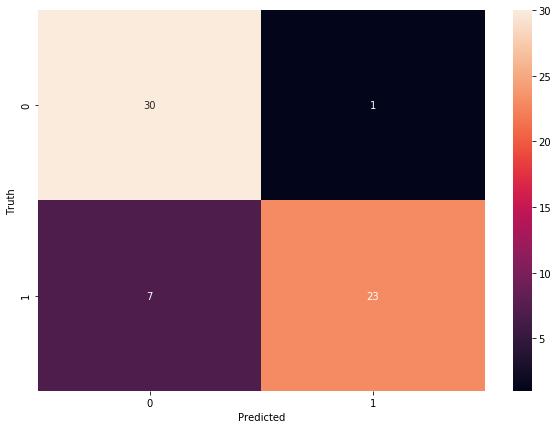

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')